<a href="https://colab.research.google.com/github/kagglematsuo/Rapid_Challenge_Report/blob/master/non_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

線形回帰モデルでは表現が難しいものを非線形回帰モデルで表現を試みる。
ただ非線形回帰モデルを作るだけではなく、ラッソ回帰で正規化をし、パラメタがスパースされていることを、この演習で確認することを目標とする。

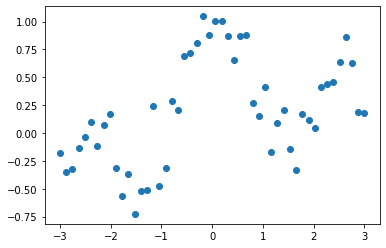

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 元のデータを作成する

n = 50; N = 1000

x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)

x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x,y)

0.19115487673873133


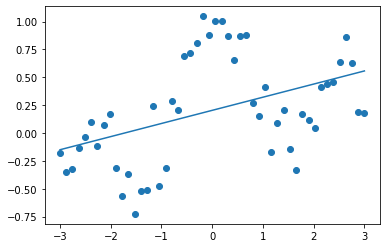

In [2]:
from sklearn.linear_model import LinearRegression

# 線形回帰モデルでの表現

clf = LinearRegression()
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X,p)

print(clf.score(x, y))

In [ ]:
線形回帰モデルでは決定係数が1から離れている

0.7712058039462099


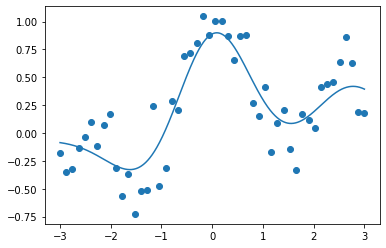

In [3]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Lasso(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

非線形回帰モデルでは決定係数が1に近づくことが分かる

In [4]:
print(clf.coef_) 

[-0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.36838076 -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.21286714  0.83126223  0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.07421258
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.49301913
  0.          0.        ]


パラメタに0が多く含まれ、スパースされていることが確認できた。